<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [34]:
def _get_scores_from_onmi_file(onmi_file):
    with open(onmi_file) as f:
        lines = f.readlines()
        max_score = float(lines[0].split('\t')[1])
        lfkScore = float(lines[2].split('\t')[1])
        sum_score = float(lines[3].split('\t')[1])
        return max_score, lfkScore, sum_score
        
input_types = ['AllNodes', 'Leafs_NoOverlap', 'Leafs_WithOverlap']

onmi_file_template = '{mac_maf}_{val}_{min_window_index}-{max_window_index}_onmi_{input_type}.txt'

In [35]:
#paths_helper = get_paths_helper()
onmi_folder = r"C:\Data\HUJI\vcf\hgdp\classes\sanity_check\onmi/"

mac_min_range = 2
mac_max_range = 18
maf_min_range = 1
maf_max_range = 49
min_window_index = 0
max_window_index = 499

input_type_2_lfk_nmi = dict()
#NOTE regarding Leafs_WithOverlap:
#     in our previous work we used the leaves with overlap! see page 2031, on the left, "Information gain by increased sequencing", paragraph 3.
#NOTE regarding LFK-NMI:
#     in our previous work we used the LFK NMI measure! see Appendix D in SI, first paragraph.
for input_type in input_types:
    print(input_type)
    input_type_2_lfk_nmi[input_type] = dict()
    class_2_lfk_nmi = input_type_2_lfk_nmi[input_type]
    # go over classes
    for mac_maf in ['mac', 'maf']:
        is_mac = mac_maf == 'mac'
        min_range = mac_min_range if is_mac else maf_min_range
        max_range = mac_max_range if is_mac else maf_max_range
        if min_range>0:
            print(f'go over {mac_maf} values: [{min_range},{max_range}]')
            for val in range(min_range, max_range+1):
                # in maf we take 0.x
                if not is_mac:
                    val = f'{val * 1.0/100}'
                onmi_file = onmi_folder + onmi_file_template.format(mac_maf=mac_maf, val=val, min_window_index=min_window_index, max_window_index=max_window_index, input_type=input_type)
                max_score, lfkScore, sum_score = _get_scores_from_onmi_file(onmi_file)
                print(mac_maf, val, max_score, lfkScore, sum_score)
                class_2_lfk_nmi[f'{mac_maf}_{val}'] = lfkScore

AllNodes
go over mac values: [2,18]
mac 2 0.0 0.0 0.0
mac 3 0.0 0.0 0.0
mac 4 0.0 0.0 0.0
mac 5 0.00817717 0.234313 0.0162168
mac 6 0.014378 0.327082 0.0283841
mac 7 0.0179105 0.282802 0.0353032
mac 8 0.0280148 0.349903 0.0546263
mac 9 0.0393891 0.394415 0.0757851
mac 10 0.0432948 0.371403 0.0831582
mac 11 0.0569022 0.301192 0.108228
mac 12 0.0542552 0.422712 0.103992
mac 13 0.0661687 0.376696 0.124631
mac 14 0.0736844 0.31043 0.137263
mac 15 0.0794247 0.36029 0.147179
mac 16 0.083469 0.372644 0.152893
mac 17 0.0886545 0.381963 0.160298
mac 18 0.100303 0.372842 0.180334
go over maf values: [1,49]
maf 0.01 0.271389 0.462637 0.442057
maf 0.02 0.324015 0.436644 0.474981
maf 0.03 0.408853 0.428324 0.571177
maf 0.04 0.460048 0.474912 0.610612
maf 0.05 0.508011 0.464253 0.644265
maf 0.06 0.504053 0.465123 0.627618
maf 0.07 0.55446 0.486154 0.651492
maf 0.08 0.575328 0.490498 0.659191
maf 0.09 0.494922 0.439659 0.568991
maf 0.1 0.55891 0.483804 0.638132
maf 0.11 0.594733 0.498259 0.654646
maf

In [36]:
input_type_2_lfk_nmi

{'AllNodes': {'mac_2': 0.0,
  'mac_3': 0.0,
  'mac_4': 0.0,
  'mac_5': 0.234313,
  'mac_6': 0.327082,
  'mac_7': 0.282802,
  'mac_8': 0.349903,
  'mac_9': 0.394415,
  'mac_10': 0.371403,
  'mac_11': 0.301192,
  'mac_12': 0.422712,
  'mac_13': 0.376696,
  'mac_14': 0.31043,
  'mac_15': 0.36029,
  'mac_16': 0.372644,
  'mac_17': 0.381963,
  'mac_18': 0.372842,
  'maf_0.01': 0.462637,
  'maf_0.02': 0.436644,
  'maf_0.03': 0.428324,
  'maf_0.04': 0.474912,
  'maf_0.05': 0.464253,
  'maf_0.06': 0.465123,
  'maf_0.07': 0.486154,
  'maf_0.08': 0.490498,
  'maf_0.09': 0.439659,
  'maf_0.1': 0.483804,
  'maf_0.11': 0.498259,
  'maf_0.12': 0.456938,
  'maf_0.13': 0.47342,
  'maf_0.14': 0.47151,
  'maf_0.15': 0.511674,
  'maf_0.16': 0.488177,
  'maf_0.17': 0.495135,
  'maf_0.18': 0.435982,
  'maf_0.19': 0.45529,
  'maf_0.2': 0.510408,
  'maf_0.21': 0.441706,
  'maf_0.22': 0.47365,
  'maf_0.23': 0.455161,
  'maf_0.24': 0.521058,
  'maf_0.25': 0.457484,
  'maf_0.26': 0.479027,
  'maf_0.27': 0.44017

AllNodes


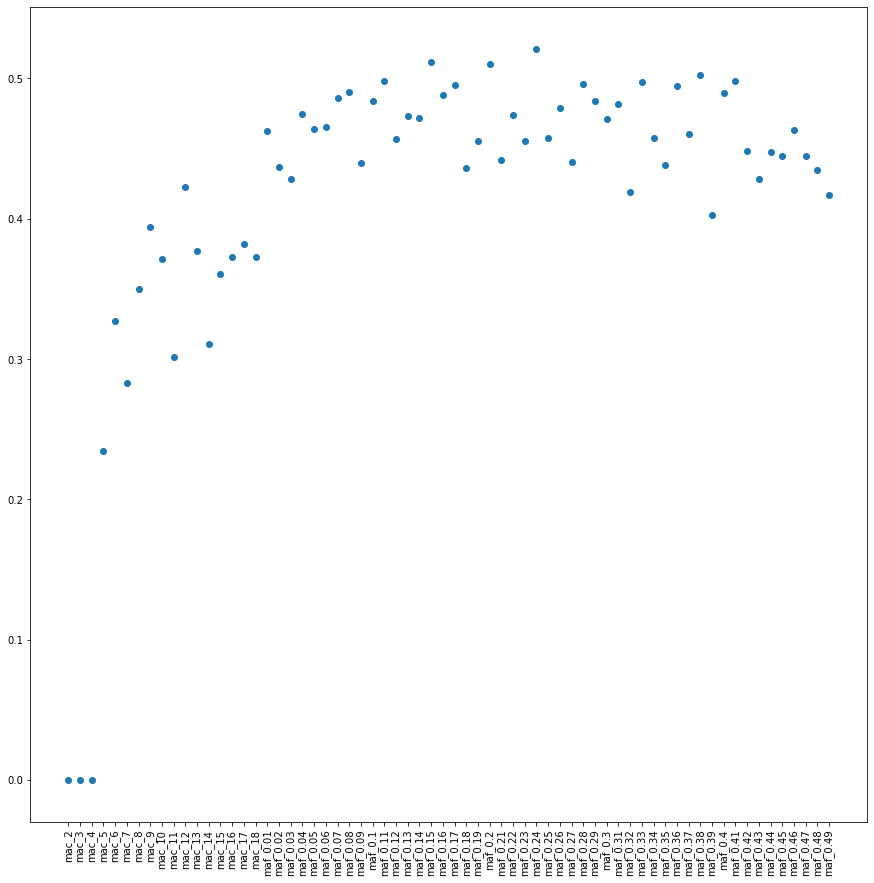

Leafs_NoOverlap


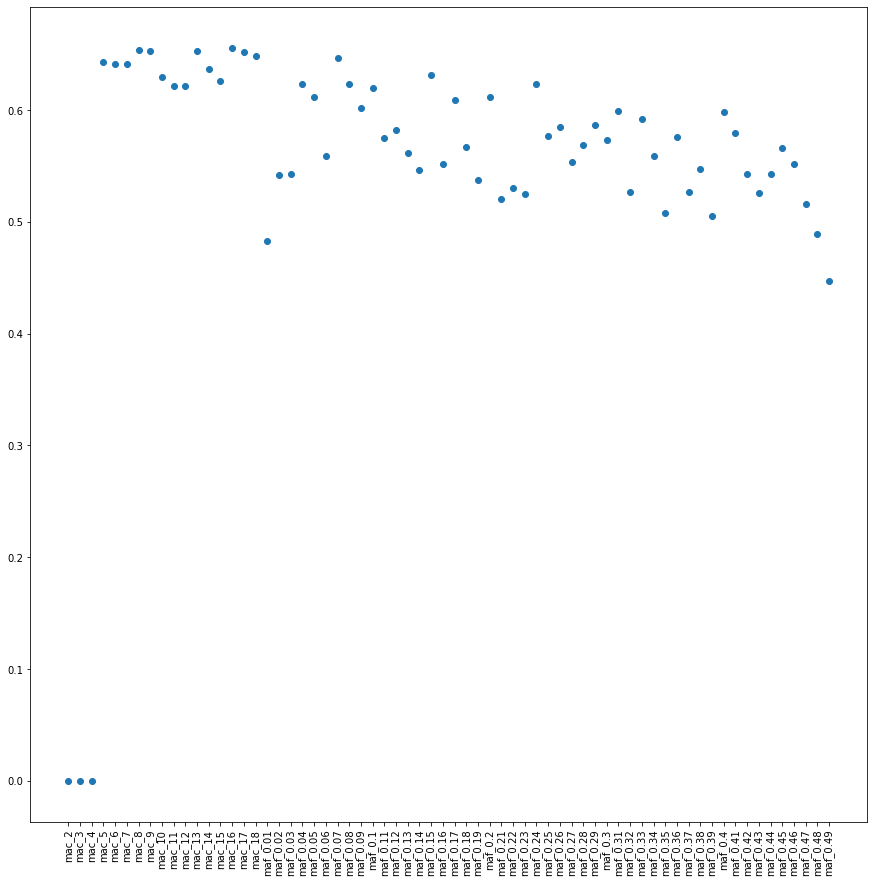

Leafs_WithOverlap


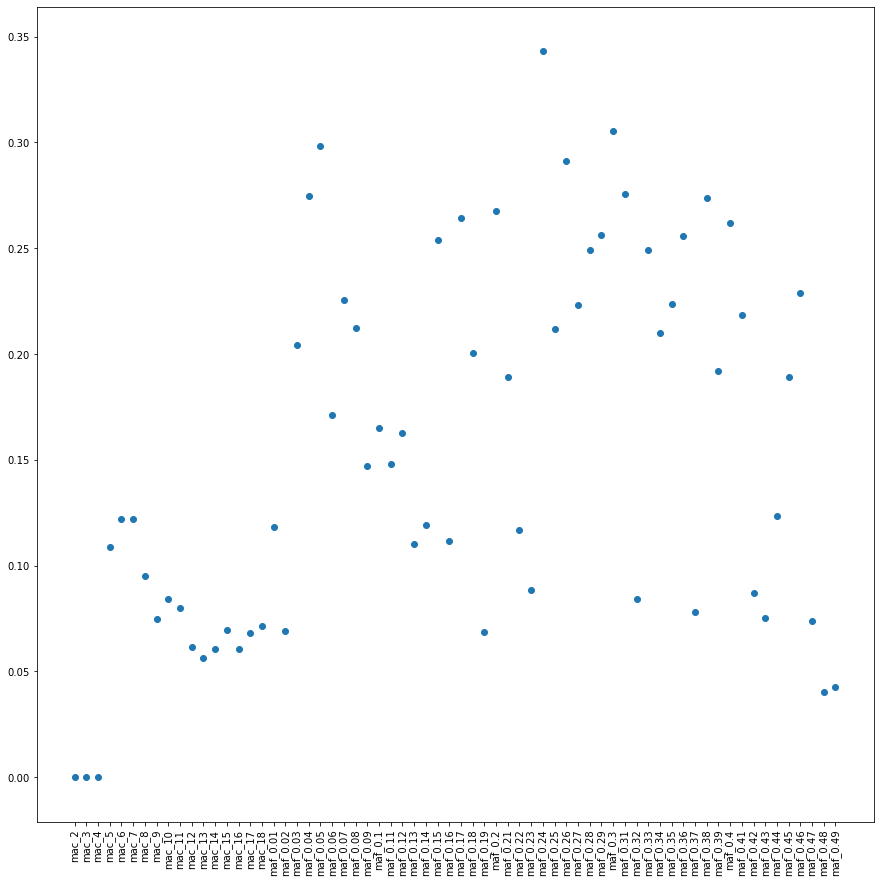

In [43]:
import matplotlib.pyplot as plt

#plot_lkf_nmi_by_class
for input_type in input_types:
    print(input_type)
    class_2_lfk_nmi = input_type_2_lfk_nmi[input_type]
    x = [str(k) for k in class_2_lfk_nmi.keys()]
    y = [v for v in class_2_lfk_nmi.values()]
    f = plt.figure()
    f.set_figwidth(15)
    f.set_figheight(15)
    ax = f.add_subplot(111)
    #for i,j in zip(x,y):
    #    ax.annotate(str(j),xy=(i,j))

    plt.scatter(x, y)
    plt.xticks(rotation = 90)
    plt.savefig(input_type+'.png')
    plt.show()
